In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [15]:
# ==========================================
# 1. CARICAMENTO E UNIONE (Fix Intelligente)
# ==========================================
# Carichiamo entrambi i file
try:
    df_clean = pd.read_csv('mdl_bl_top_rated_finale.csv') # Dati puliti (Anno, Episodi)
    df_orig = pd.read_csv('mdl_bl_top_rated.csv')         # Dati originali (Rating)
except FileNotFoundError as e:
    print(f"ERRORE: Manca un file! Assicurati di avere entrambi i csv nella cartella. ({e})")
    exit()

# Uniamo i due dataset usando la colonna 'rank' come chiave comune
# Questo aggiunge la colonna 'rating' al nostro dataset pulito
df = pd.merge(df_clean, df_orig[['rank', 'rating']], on='rank', how='left')

print("Dati uniti con successo!")
print(f"Colonne disponibili: {df.columns.tolist()}")

Dati uniti con successo!
Colonne disponibili: ['rank', 'title', 'country', 'type', 'year_released', 'episodes', 'rating']


### Grafico a barre orizzontale

Da questo grafico si può vedere come in Thailandia si producano molti più drama BL rispetto alla controparte giapponese

C:\Users\Guerr\AppData\Local\Temp\ipykernel_14724\3354961727.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=country_counts, y='country', x='count', palette="viridis")


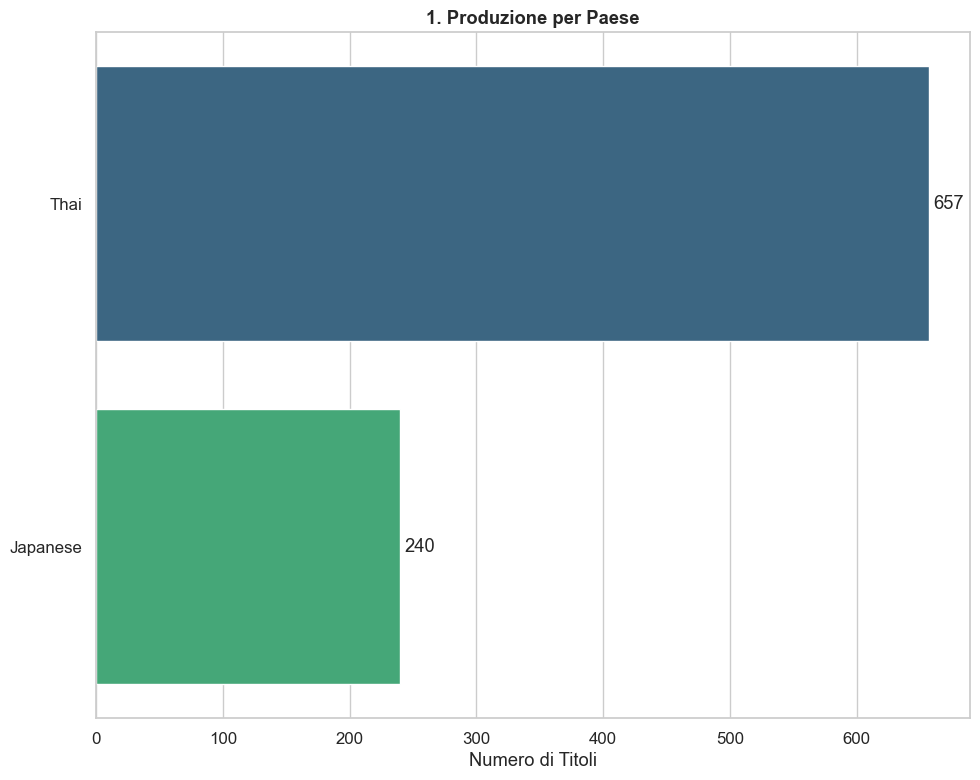

In [47]:
# --- Grafico 1: Chi produce di più? (Bar Plot) ---
plt.figure(figsize=(10, 8)) # Dimensione ottimale per un grafico singolo
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

ax1 = sns.barplot(data=country_counts, y='country', x='count', palette="viridis")
plt.title('1. Produzione per Paese', fontweight='bold')
plt.xlabel('Numero di Titoli')
plt.ylabel('')
for i in ax1.containers:
    ax1.bar_label(i, padding=3)

plt.tight_layout()
plt.savefig('grafico_1_paesi.png') # Salva
plt.show() # Mostra
plt.close() # Chiude per liberare memoria

Da questo grafico si nota come le persone premino molto di più i drama giapponesi

C:\Users\Guerr\AppData\Local\Temp\ipykernel_14724\3482403602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=country_stats, y='country', x='mean', palette="magma")


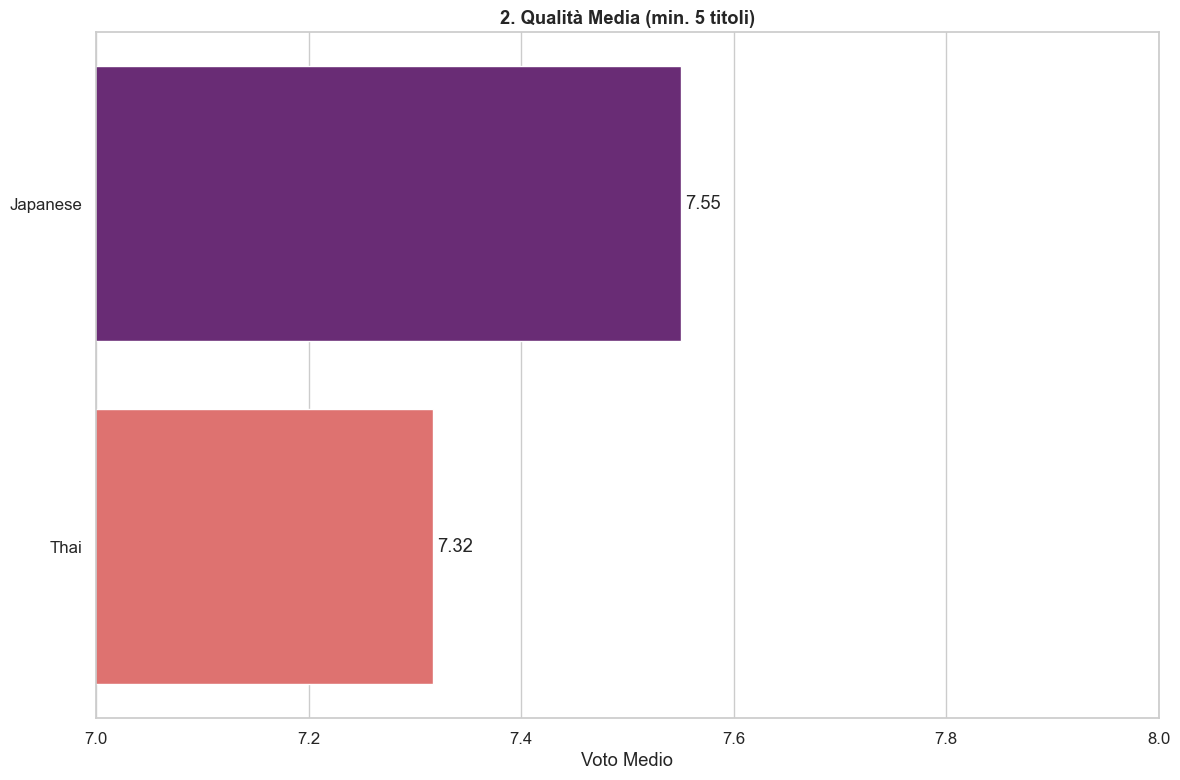

In [48]:
# --- Grafico 2: Chi ha i voti più alti? ---
plt.figure(figsize=(12, 8))
country_stats = df.groupby('country')['rating'].agg(['mean', 'count']).reset_index()
country_stats = country_stats[country_stats['count'] >= 5].sort_values('mean', ascending=False)

ax2 = sns.barplot(data=country_stats, y='country', x='mean', palette="magma")
plt.title('2. Qualità Media (min. 5 titoli)', fontweight='bold')
plt.xlabel('Voto Medio')
plt.ylabel('')
plt.xlim(7.0, 8.0)
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig('grafico_2_voti.png')
plt.show()
plt.close()

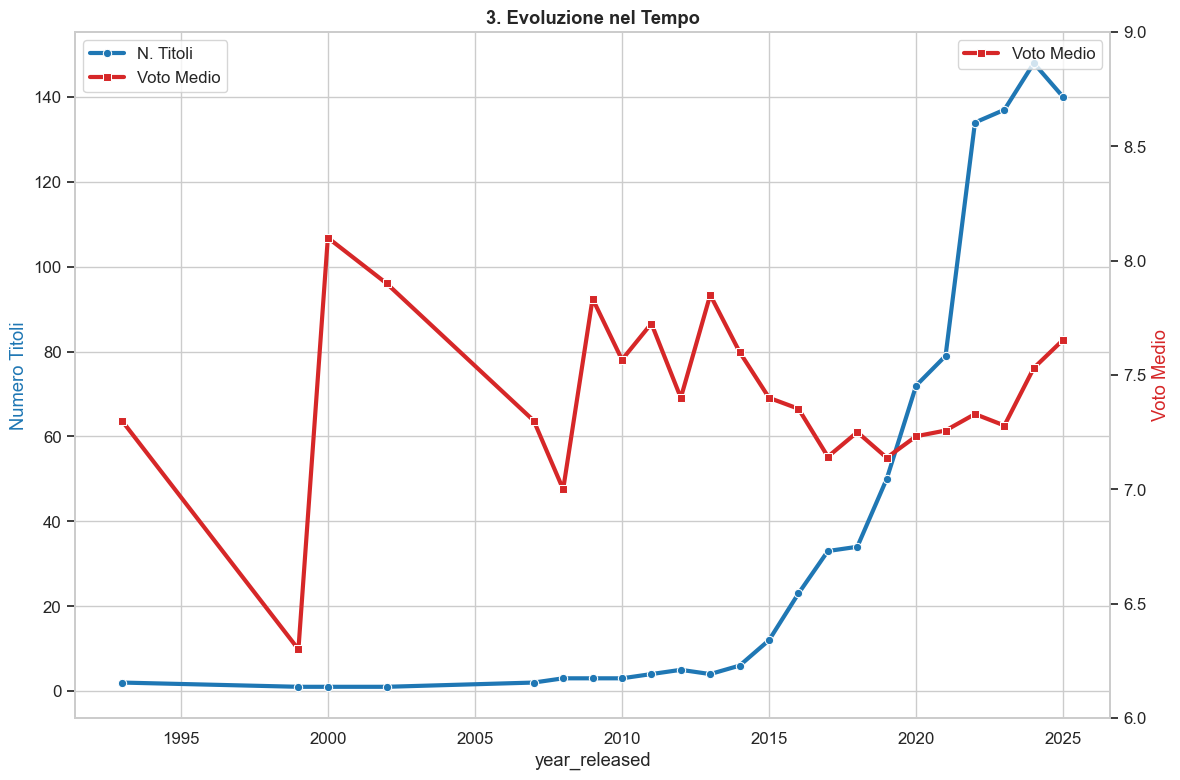

In [49]:
# --- GRAFICO 3: Evoluzione Temporale ---
plt.figure(figsize=(12, 8))
year_stats = df.groupby('year_released').agg({'title': 'count', 'rating': 'mean'})

ax3 = sns.lineplot(data=year_stats, x=year_stats.index, y='title', marker='o', color='#1f77b4', label='N. Titoli', linewidth=3)
ax3.set_ylabel('Numero Titoli', color='#1f77b4')

ax4 = ax3.twinx()
sns.lineplot(data=year_stats, x=year_stats.index, y='rating', marker='s', color='#d62728', label='Voto Medio', linewidth=3, ax=ax4)
ax4.set_ylabel('Voto Medio', color='#d62728')
ax4.set_ylim(6, 9)
ax4.grid(False)

plt.title('3. Evoluzione nel Tempo', fontweight='bold')
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('grafico_3_tempo.png')
plt.show()
plt.close()

Risultato: dice quali anni verranno ricordati come "grandi annate". Il 2023 e il 2024 sembrano essere stati anni incredibili per numero di serie di alta qualità.

C:\Users\Guerr\AppData\Local\Temp\ipykernel_14724\3816623262.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=top_tier_counts, x='year_released', y='count', palette="Oranges")


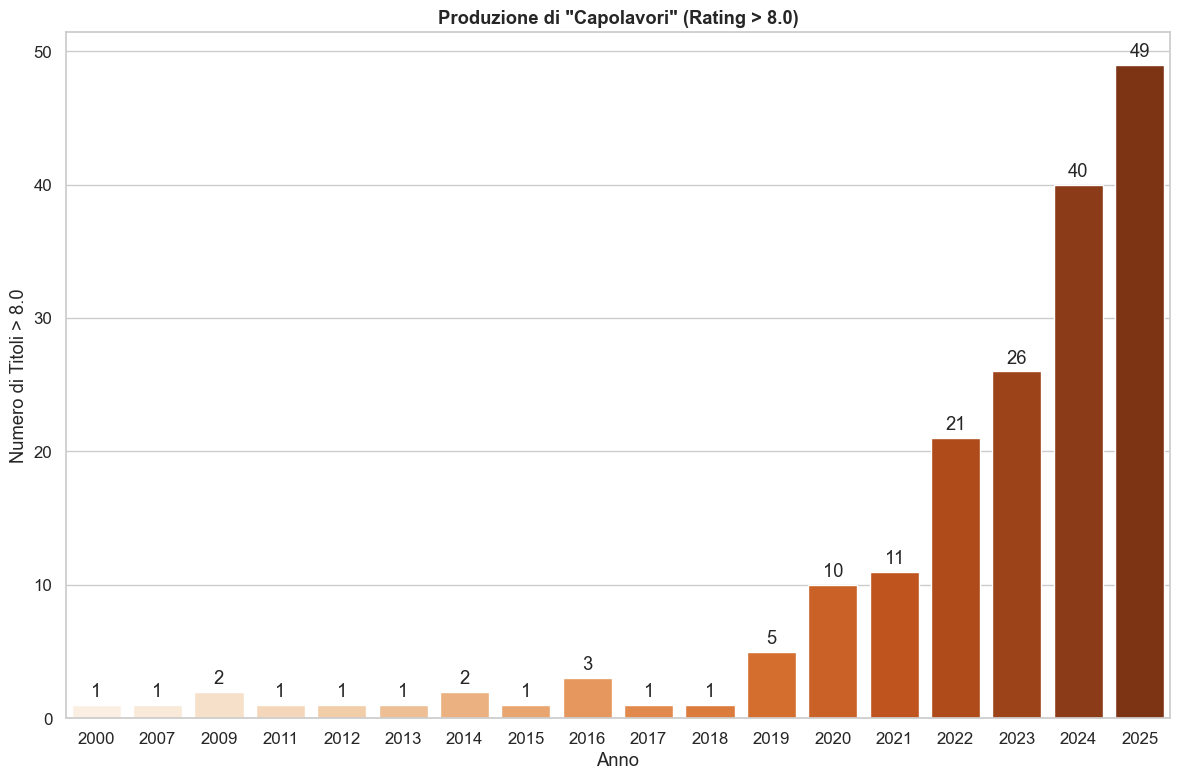

In [52]:
# ==============================================================================
# GRAFICO 1: I "CAPOLAVORI" (Quanti titoli > 8.0?)
# ==============================================================================
# Questo è il vero indice di influenza: quanti drama memorabili ha prodotto un anno?
top_tier_threshold = 8.0
df_top_tier = df[df['rating'] >= top_tier_threshold]
top_tier_counts = df_top_tier['year_released'].value_counts().sort_index().reset_index()
top_tier_counts.columns = ['year_released', 'count']

plt.figure(figsize=(12, 8))
ax1 = sns.barplot(data=top_tier_counts, x='year_released', y='count', palette="Oranges")
plt.title(f'Produzione di "Capolavori" (Rating > {top_tier_threshold})', fontweight='bold')
plt.xlabel('Anno')
plt.ylabel('Numero di Titoli > 8.0')
# Etichette sulle barre
for i in ax1.containers:
    ax1.bar_label(i, padding=3)

plt.tight_layout()
plt.savefig('analisi_anni_capolavori.png')
plt.show()
plt.close()

La Heatmap del Dominio (Blu/Verde): Questo grafico incrocia Paesi e Anni.

Si può vedere chiaramente come il Giappone fosse quasi assente anni fa e come sia cresciuto e l'anno esatto in cui la Thailandia ha fatto il "boom" (i quadrati diventano blu scuro).

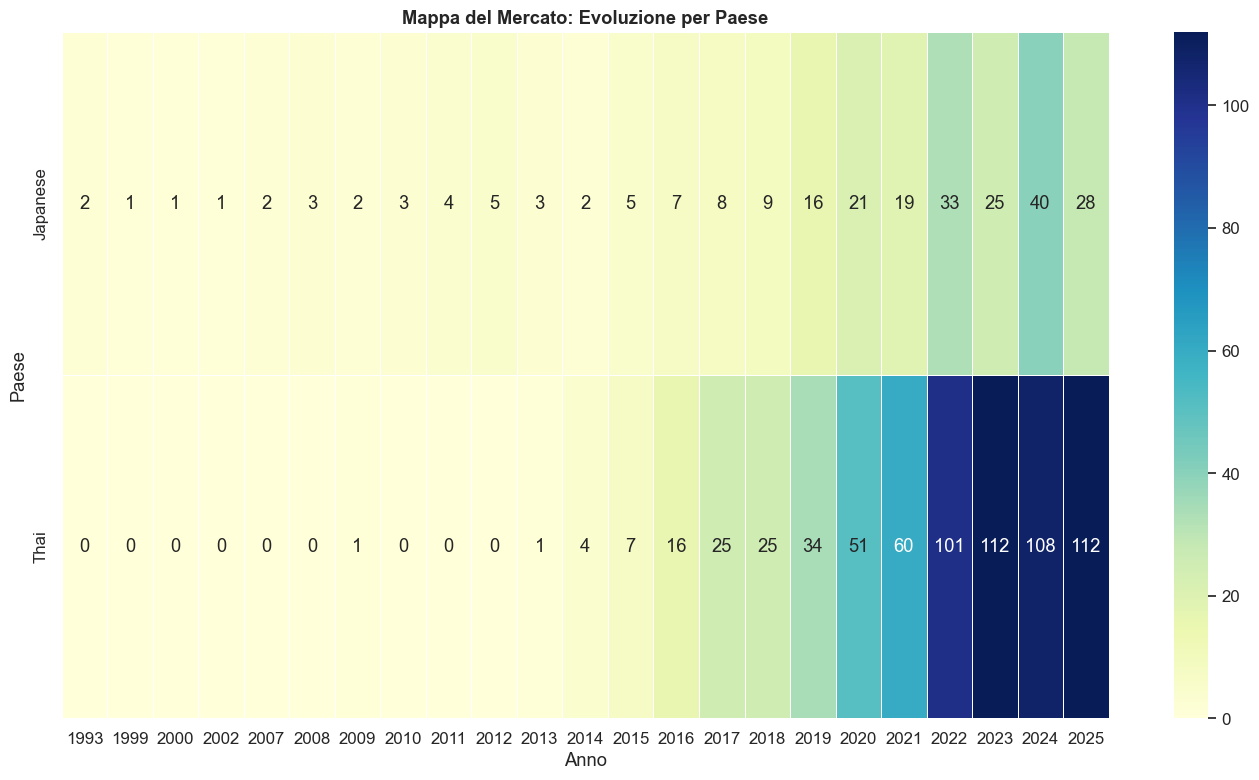

In [53]:
# ==============================================================================
# GRAFICO 2: HEATMAP DEL DOMINIO (Chi regnava e quando?)
# ==============================================================================
# Matrice: Righe=Paesi, Colonne=Anni, Colore=Numero Titoli
# Prendiamo solo i Top 5 paesi per leggibilità
top_countries = df['country'].value_counts().head(5).index
heatmap_data = df[df['country'].isin(top_countries)].groupby(['country', 'year_released']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
# annot=True scrive i numeri nelle caselle
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Mappa del Mercato: Evoluzione per Paese', fontweight='bold')
plt.xlabel('Anno')
plt.ylabel('Paese')
plt.tight_layout()
plt.savefig('analisi_anni_heatmap.png')
plt.show()
plt.close()

L'Anno d'Oro (Linea Viola): Mostra la media voti pura.

Attenzione: Spesso gli anni vecchi hanno medie alte perché ci sono pochi titoli ma "cult", mentre gli anni recenti hanno medie più basse perché esce di tutto. Tuttavia, il grafico mostrerà se c'è un trend di miglioramento qualitativo.

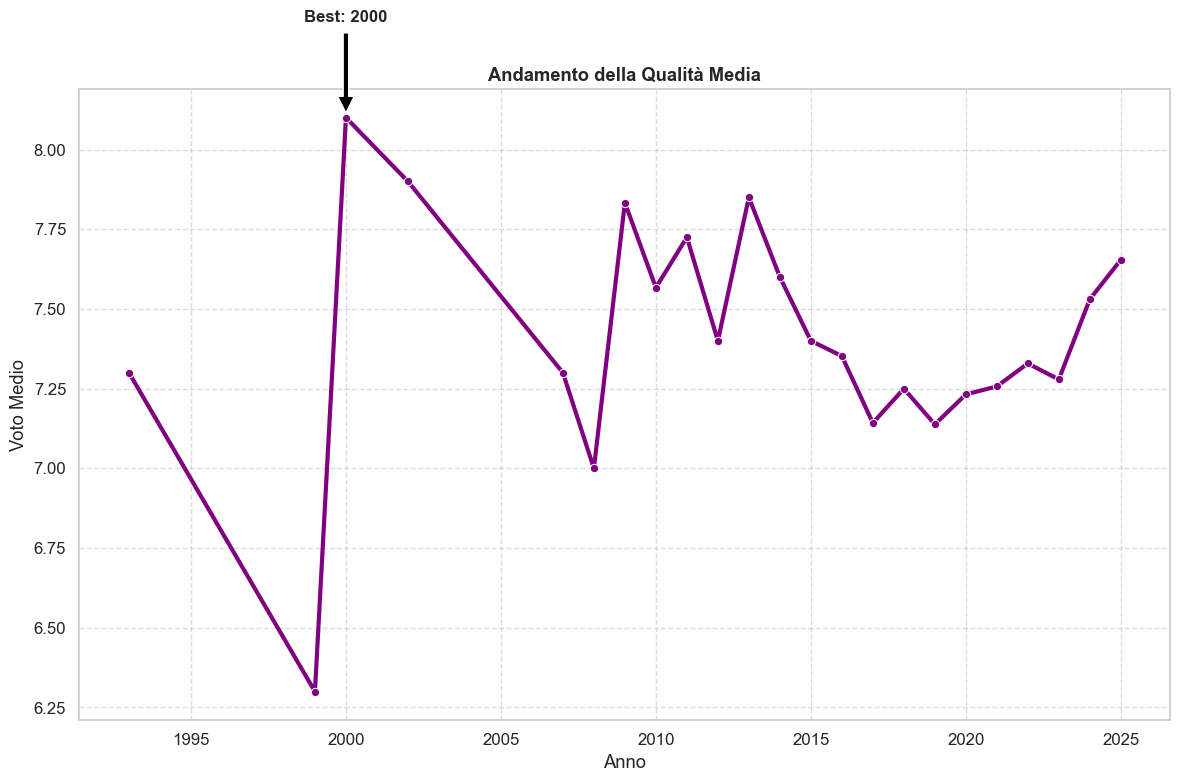

In [54]:
# ==============================================================================
# GRAFICO 3: LA QUALITÀ MEDIA (L'Anno d'Oro)
# ==============================================================================
year_avg = df.groupby('year_released')['rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=year_avg, x='year_released', y='rating', marker='o', linewidth=3, color='purple')
plt.title('Andamento della Qualità Media', fontweight='bold')
plt.xlabel('Anno')
plt.ylabel('Voto Medio')
plt.grid(True, linestyle='--', alpha=0.7)

# Troviamo ed evidenziamo il punto massimo
max_rating = year_avg['rating'].max()
best_year = year_avg.loc[year_avg['rating'].idxmax(), 'year_released']
plt.annotate(f'Best: {int(best_year)}', 
             xy=(best_year, max_rating), 
             xytext=(best_year, max_rating+0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, fontweight='bold', ha='center')

plt.tight_layout()
plt.savefig('analisi_anni_ranking.png')
plt.show()
plt.close()

La Sfida Finale: Thai vs Japan (Grafico a Curve - KDE):


La curva Giapponese (blu) è più spostata verso destra (voti più alti) e più "stretta" (qualità più costante).
La curva Thailandese (rossa) è più "larga": producono tantissimo, quindi hanno sia capolavori che titoli mediocri, coprendo tutto lo spettro.

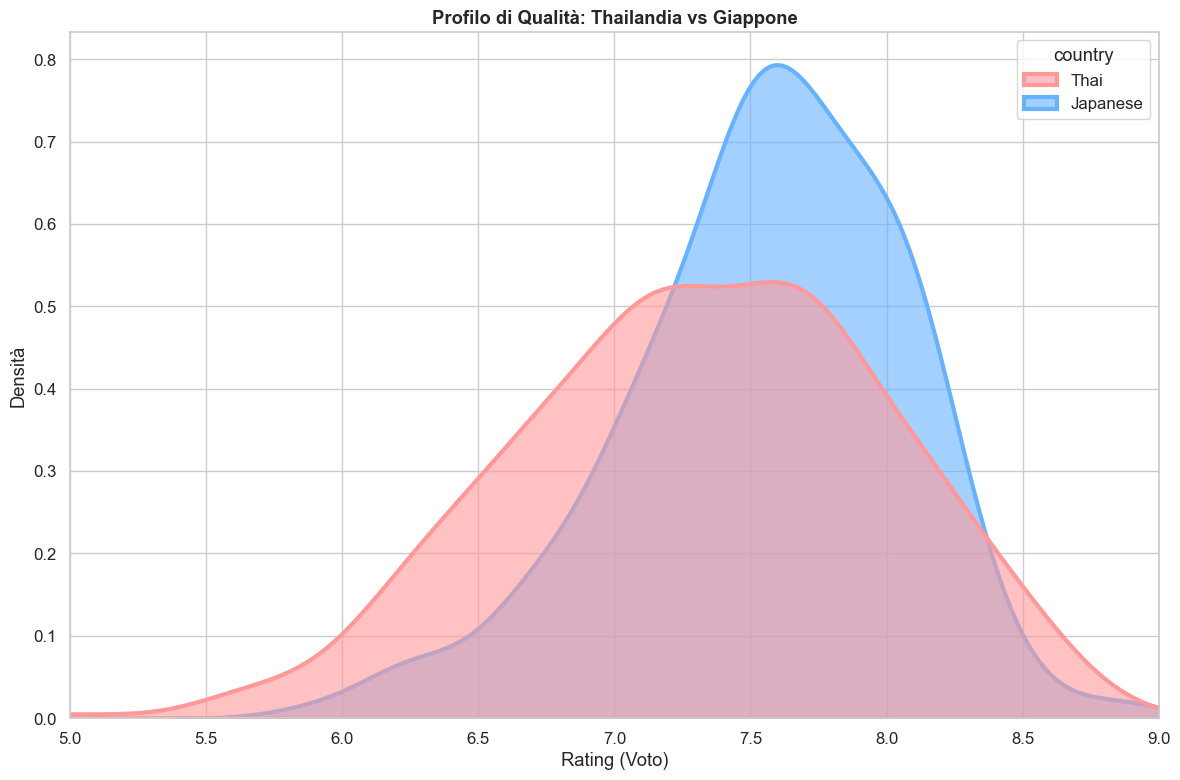

In [55]:
# ==============================================================================
# GRAFICO 2: PROFILO DI VOTO (Thai vs Japan)
# ==============================================================================
plt.figure(figsize=(12, 8))
# Confrontiamo solo i due leader del mercato
df_giants = df[df['country'].isin(['Thai', 'Japanese'])]

# KDE Plot (Kernel Density Estimate) mostra la distribuzione come una curva
sns.kdeplot(data=df_giants, x='rating', hue='country', fill=True, common_norm=False, palette=['#FF9999', '#66B2FF'], alpha=0.6, linewidth=3)
plt.title('Profilo di Qualità: Thailandia vs Giappone', fontweight='bold')
plt.xlabel('Rating (Voto)')
plt.ylabel('Densità')
plt.xlim(5, 9) 
plt.tight_layout()
plt.savefig('analisi_confronto_kde.png')
plt.show()
plt.close()